# Intelligent Analytics Data Visualiation, Imputation & Feature Selection Assignment
### Mathai Paul | GX3081

### 1. Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

from scipy import stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap 

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
# Required to run matplotlib in jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Description
#### Number of Instances: 4601 (1813 Spam = 39.4%)

#### Number of Attributes: 58 (57 continuous, 1 nominal class label)

### Attribute Information:

#### The last column of 'spambase.data' denotes whether the e-mail was 
#### considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  

#### Here are the definitions of the attributes:

#### 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD,
#### i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.  A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

#### 6 continuous real [0,100] attributes of type char_freq_CHAR= percentage of characters in the e-mail that match CHAR,
#### i.e. 100 * (number of CHAR occurences) / total characters in e-mail

#### 1 continuous real [1,...] attribute of type capital_run_length_average= average length of uninterrupted sequences of capital letters

#### 1 continuous integer [1,...] attribute of type capital_run_length_longest= length of longest uninterrupted sequence of capital letters

#### 1 continuous integer [1,...] attribute of type capital_run_length_total= sum of length of uninterrupted sequences of capital letters= total number of capital letters in the e-mail

#### 1 nominal {0,1} class attribute of type spam= denotes whether the e-mail was considered spam (1) or not (0), 
#### i.e. unsolicited commercial e-mail.  

### Importing Data
#### Data is imported into a pandas dataframe
#### Since the data did not have column specified, it was manually added from the info file to the data file.

In [2]:
df = pd.read_csv("spam.data.txt")
df

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,capital_run_length_average,ccapital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [3]:
df.columns.unique()

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', 'capital_run_length_average',
       'ccapital_run_length_longest', 'capital_run_length_total', 'class'],
      dtype='object')

### Data Wrangling
#### Start by checking for null values, which prooved to be non existant as there are only zeros and they are ofsignificance hence they can't be filled to complete that data.

In [4]:
df_null_values = df.isnull().sum()
df_null_values.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,capital_run_length_average,ccapital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


#### Separating data to X and Y values to be used later. ten current form contains column names as well, which will have to be removed later.

In [6]:
Y_num = df['class']
X_num = df.drop(['class'], axis = 1)
X_num

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,capital_run_length_average,ccapital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.0,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.0,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.0,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749


### Normalise the data
Starting by normalising the values to reduce the cost of outliers and extreme values.

In [7]:
# Normalise the Data
X_num_std = StandardScaler().fit_transform(X_num)
X_num_std = pd.DataFrame(X_num_std)
X_num_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,...,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03,4.601000e+03
mean,1.853187e-17,2.779780e-17,2.470916e-17,0.000000,4.941832e-17,3.706374e-17,-2.470916e-17,0.000000,2.470916e-17,1.235458e-17,...,-6.177290e-18,1.235458e-17,-8.030476e-17,-2.470916e-17,1.235458e-17,0.000000,-9.265934e-18,1.853187e-17,1.235458e-17,2.470916e-17
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-1.321161e-01,-2.625994e-01,-4.656073e-01
25%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-5.143065e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-1.135824e-01,-2.369413e-01,-4.095278e-01
50%,-3.424337e-01,-1.650719e-01,-5.567606e-01,-0.046900,-4.643144e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-3.713644e-01,...,-1.115462e-01,-1.584534e-01,-2.738561e-01,-1.551977e-01,-3.299123e-01,-0.308355,-1.030484e-01,-9.189671e-02,-1.907567e-01,-3.105639e-01
75%,-3.424337e-01,-1.650719e-01,2.764271e-01,-0.046900,1.007920e-01,-3.502662e-01,-2.917939e-01,-0.262562,-3.233024e-01,-1.231813e-01,...,-1.115462e-01,-1.584534e-01,1.811501e-01,-1.551977e-01,5.631450e-02,-0.096848,-1.030484e-01,-4.682327e-02,-4.707129e-02,-2.851691e-02
max,1.452700e+01,1.090096e+01,9.560519e+00,30.641278,1.440691e+01,2.112571e+01,1.828261e+01,27.441249,1.855779e+01,2.782844e+01,...,3.488976e+01,1.785384e+01,3.556066e+01,3.715432e+01,3.949191e+01,24.108447,4.608659e+01,3.458704e+01,5.099205e+01,2.566085e+01


#### Since Y is already normaised we can combine both to create a normalised original clean dataset.

In [8]:
# Combining the X,Y after normailsation
df_norm = pd.concat((X_num_std, Y_num), axis = 1)
df_norm

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,class
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
5,-0.342434,-0.165072,-0.556761,-0.0469,2.286862,-0.350266,-0.291794,4.350584,-0.323302,-0.371364,...,-0.158453,0.310623,-0.155198,-0.329912,-0.308355,-0.103048,-0.069076,-0.190757,-0.378189,1
6,-0.342434,-0.165072,-0.556761,-0.0469,2.390960,-0.350266,-0.291794,-0.262562,-0.323302,0.621368,...,-0.158453,-0.314548,-0.155198,-0.128829,-0.088714,-0.103048,-0.110966,-0.247205,-0.282524,1
7,-0.342434,-0.165072,-0.556761,-0.0469,2.331475,-0.350266,-0.291794,4.425392,-0.323302,-0.371364,...,-0.158453,0.247736,-0.155198,-0.329912,-0.308355,-0.103048,-0.086412,-0.211283,-0.386436,1
8,0.148847,-0.165072,0.355778,-0.0469,0.442830,-0.350266,0.474688,-0.262562,2.979094,0.807505,...,-0.158453,0.488187,-0.155198,-0.107985,0.517334,-0.051802,0.143494,2.015841,1.606036,1
9,-0.145921,-0.072080,0.970750,-0.0469,-0.181761,0.818494,0.679083,-0.262562,-0.107929,-0.371364,...,0.005855,-0.403329,-0.155198,-0.030740,0.021107,-0.103048,-0.109138,-0.047071,0.768142,1


In [9]:
# Checking fon Dimentions of data before EDA
Y = df_norm.iloc[:,[57]].values
X = np.asarray(df_norm.drop(['class'], axis = 1))
print ("Shape of X: ", X.shape)
print ("Shape of Y: ", Y.shape)

Shape of X:  (4601, 57)
Shape of Y:  (4601, 1)


### EDA
#### Starting EDA by asking a few Questionns and trying to answer them from the data to understand the diversity and scope of data available.
#### Checking for Bias in data, Data availability for each class and data distribution. From what we already know is the data is sufficient quantity and quality and there are enough features for us to predict the outcome of classes.
#### In EDA, we will try to establish answers to following questions:
1. Data biased
2. Data Distribution
3. Data Availabity for each class
4. Relationship between capital and length longest and class

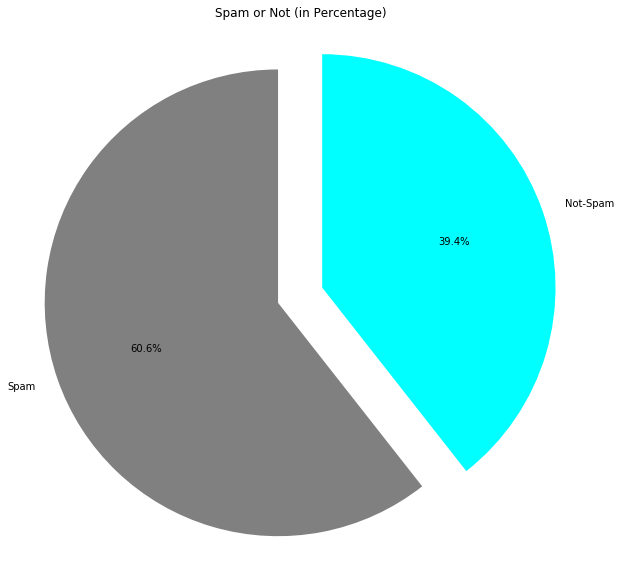

In [61]:
#Data biased? Data Distribution? Data Availabity for each class?
labels = ['Spam', 'Not-Spam']   
sizes = df['class'].value_counts()         
explode = (0, 0.2)                               
col = ("gray", 'cyan')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = col)


ax1.axis('equal')  
fig1.set_size_inches(8, 8)                       
plt.tight_layout()
plt.title("Spam or Not (in Percentage)")
plt.show()

#### That the data is not extremely biased it has 39.4% in one class and 60.6% and another which is relatively fine since we have enough data points for both the classes. Commenting on the diversity of data points will be a good clean data to work on.
#### Class Distribution:
#### 1. Spam	  1813  (39.4%)
#### 2. Non-Spam  2788  (60.6%)

In [11]:
# Absolute value For the above given Distribution of data
count = df['class'].value_counts()
count

0    2788
1    1813
Name: class, dtype: int64

### Relationship between capital and length longest and class
#### Here we have calculated the count based on the capital one length longest against class, here we can observe that the initial count have a large number of entries since the The longest capital run length as possible chocolate lens compare to larger lens but still we can observe certain values leading up to 9989 which we can consider as an outlier. I have not remove the outlier since this is the original data and the date of using is normal lives and the cost is less and it would not impact classification much.

In [12]:

df_long = df[(df['class'] == 1)]
long  = df_long.groupby(["ccapital_run_length_longest"])["class"].count()
long

ccapital_run_length_longest
1       18
2        4
3       15
4       26
5       22
6       23
7       20
8       21
9       10
10      48
11      66
12      96
13      34
14      25
15      30
16      30
17      22
18      17
19      45
20      20
21      23
22      36
23      20
24      11
25      35
26      13
27       9
28      26
29      20
30      20
        ..
669     27
683      1
685      2
689      1
691      1
694      1
696      2
706      1
708      2
735      1
739      2
763      2
772      1
798      1
842      1
845      1
887      1
1013     1
1038     2
1146     2
1170     1
1171     2
1177     3
1325     2
1327     1
1333     1
1505     1
2042     1
2204     1
9989     1
Name: class, Length: 254, dtype: int64

#### The outliers can also be seen in this line graph with the most of the data is dense towards the beginning of the plot starting from 0 to 20 but after that there are certain outlers. In a normal situation the model tends to overlook such outliers as we have reduced the expense of it.

Text(0.5,1,'Count of Capital Run Length Longest')

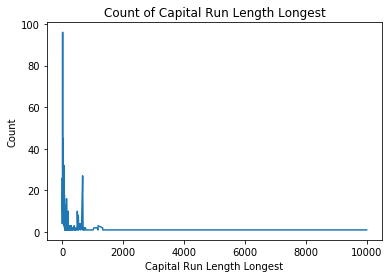

In [93]:
plt.figure(figsize = (6,4))
plt.plot(long)
plt.xlabel("Capital Run Length Longest")
plt.ylabel("Count")
plt.title("Count of Capital Run Length Longest")

In [14]:
df_notspam = df[(df['class'] == 0)]
notspam  = df_notspam.groupby(["ccapital_run_length_longest"])["class"].count()
notspam_list = notspam.tolist()
long_list = long.tolist()

#### Getting the unique values of capital grant left longest and shortest them by increasing order we can see that initial value is a highly dense while the letter is extreme cases and mostly from spam emails from since the longest capital typing is a clear indication of spam emails.

In [67]:
Unique_Word_length = df['ccapital_run_length_longest'].unique() 
Unique_Word_length.sort()
Unique_Word_length

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   89,
         90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
        101,  102,  103,  104,  105,  107,  108,  110,  111,  113,  114,
        115,  116,  117,  118,  119,  121,  122,  123,  124,  126,  127,
        128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
        139,  140,  142,  143,  144,  145,  146,  147,  148,  149,  151,
        152,  153,  154,  155,  157,  158,  159,  1

#### Based on the above data we can assume that there is a relationship between capital letter longest and spam emails, evident from the T statistic value and P value below which clearly shows a good indication and relationship between the lawn is capital letters run and spam email.

In [16]:
capital_letter_longest = df['ccapital_run_length_longest']
classes = df['class']

t_test = stats.ttest_ind(capital_letter_longest, classes)
print("t-statistic value is: ", t_test[0])
print("p-value is: ", t_test[1])
# there is a relationship between capital letter longest and spam emails

t-statistic value is:  18.02120333767307
p-value is:  2.2231854921704537e-71


### Reducing Dimentions to Visualize Plots
#### To understand the difference of Dimensional reduction with various techniques we will implement three dimensionalty reduction methods.
1. PCA
2. t-SNE
3. UMAP

### PCA
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. 

In [87]:
pca = PCA(n_components=10)
pca_results = pca.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11564791 0.05732214 0.03511394 0.02816751 0.02694982 0.02530473
 0.02421688 0.02372734 0.02200829 0.02120121]


#### Summing the diagonal values we can see the variability of the given data after reducing it to 10 n components.

In [88]:
val = format(pca.explained_variance_ratio_)
print(val[0]+val[4]+val[8])

[17


#### Looking at the first 10 principal components We observe that we are able to reduce dimensions, but the variablity is not good.
#### Using the newly formed principal components we will be creating a new dataset to represent the original data as it is in the format given below.

In [89]:
# Making a new dataset with PCA data

df_pca = pd.DataFrame(data = pca_results, columns = ['pca_1', 'pca_2','pca_3', 'pca_4','pca_5', 'pca_6','pca_7', 'pca_8','pca_9', 'pca_10'])
Y_df = pd.DataFrame(data = Y, columns = ['class_labels'])
pca_df = pd.concat((df_pca, Y_df), axis = 1)
pca_df

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,class_labels
0,-0.731879,-0.044032,-0.594083,0.226920,-0.238664,-0.646561,0.250169,-0.160841,-0.427644,-1.079383,1
1,-1.184624,2.074184,0.054967,-0.475026,-0.488551,-0.605781,-0.283924,0.759877,-0.334004,0.550464,1
2,-1.468295,5.018832,3.256786,-1.090391,0.545971,-3.389409,-1.698692,-2.015589,1.200200,-0.839308,1
3,-0.805419,0.431702,-0.539414,0.055490,0.050297,0.546535,0.271592,-0.396935,0.419402,0.248245,1
4,-0.806351,0.430941,-0.541458,0.055397,0.050298,0.546197,0.270056,-0.398481,0.420217,0.248864,1
5,-0.493677,-0.485844,-0.328771,0.524243,0.713222,0.388104,0.204195,-1.134778,1.141334,0.526503,1
6,-1.026710,1.019670,-1.706524,0.039504,1.116737,1.122880,0.068414,-0.052355,-0.031212,-0.172898,1
7,-0.505468,-0.483815,-0.373202,0.513656,0.722894,0.396788,0.179990,-1.160103,1.163182,0.538092,1
8,-1.264800,3.637606,1.438045,-0.131071,1.673996,2.991439,1.372337,-1.581272,1.267289,0.724277,1
9,-0.841727,0.400990,0.033884,0.304780,-0.193783,-0.940656,-0.211093,0.153931,-0.037871,-0.124188,1


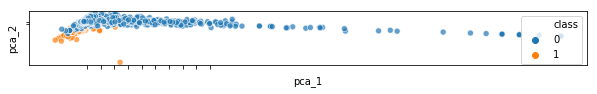

In [91]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.scatterplot(x="pca_1", y="pca_2",hue = Y_num ,data=pca_df,legend="full",alpha=0.7)

#### From the plot we can see that PCA is really able to cluster very less values, which is mostly in the bottom left corner and towards the start of data.

### t-SNE
The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked while dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map.

In [21]:
tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=500)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 4601 samples in 0.018s...
[t-SNE] Computed neighbors for 4601 samples in 2.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4601
[t-SNE] Computed conditional probabilities for sample 2000 / 4601
[t-SNE] Computed conditional probabilities for sample 3000 / 4601
[t-SNE] Computed conditional probabilities for sample 4000 / 4601
[t-SNE] Computed conditional probabilities for sample 4601 / 4601
[t-SNE] Mean sigma: 1.715618
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.748894
[t-SNE] KL divergence after 500 iterations: 1.161045


#### We can see that the t-SNE hey significantly reduce the key and divergens from 250 directions to 500 iterations define KL divergens is 1.161045.
#### Below we have the newly created dataset which has reduced the initial data into a two dimensional data say the first column is the first invention in the second column along with the class which makes it easier for us to handle the data compared to running it with a number of dimentions.

In [22]:
tsne_df = pd.DataFrame()
tsne_results_df = pd.DataFrame()
tsne_results_df['tsne-2d-one'] = tsne_results[:,0]; tsne_results_df['tsne-2d-two'] = tsne_results[:,1]
tsne_df = pd.concat((tsne_results_df, Y_df), axis = 1)
tsne_df

,tsne-2d-one,tsne-2d-two,class_labels
0,10.504769,-3.230023,1
1,7.475053,-18.622490,1
2,2.727350,-26.943041,1
3,8.796774,-7.328444,1
4,8.796972,-7.328465,1
5,-9.398491,-14.374928,1
6,13.041820,-7.561894,1
7,-9.401067,-14.385077,1
8,21.300299,-19.493729,1
9,6.706314,-2.255002,1


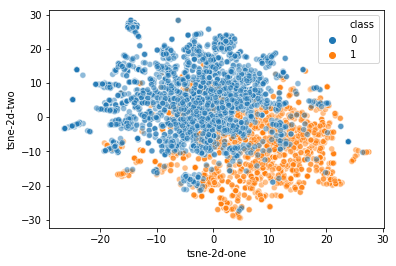

In [92]:
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue = Y_num ,data=tsne_df,legend="full",alpha=0.5)

#### Observing the cluster above we can see t-SNE need is able to classify the date of pretty well and better than this year we can clearly see more one values being classified compared to 0 is as PCA was only be able to see not spam dataset and marking all of it as not spam 

### UMAP
Uniform manifold approximation and projection (UMAP) is a nonlinear dimensionality reduction technique. Visually, it is similar to t-SNE, but it assumes that the data is uniformly distributed on a locally connected Riemannian manifold and that the Riemannian metric is locally constant or approximately locally constant.

In [25]:
umap_results = umap.UMAP(n_neighbors=12,min_dist=.05,metric='correlation').fit_transform(X)

#### Similar to TSME we are going to create a new data for you map which contains the new reduced dimensions from 57 to 2. The data shown below contains the first mention in the first column in the second dimension in the second column for the third column is the class label.

In [94]:
umap_df = pd.DataFrame()
umap_results_df = pd.DataFrame()
umap_results_df['umap_1'] = umap_results[:,0]; umap_results_df['umap_2'] = umap_results[:,1]
umap_df = pd.concat((umap_results_df, Y_df), axis = 1)
umap_df

,umap_1,umap_2,class_labels
0,5.973098,1.828977,1
1,3.962097,-1.959572,1
2,9.869151,13.788607,1
3,5.743976,-0.817186,1
4,5.689371,-0.861919,1
5,2.013100,2.648626,1
6,6.126545,-0.587141,1
7,2.017685,2.625521,1
8,-1.025648,3.086705,1
9,4.220675,-2.535060,1


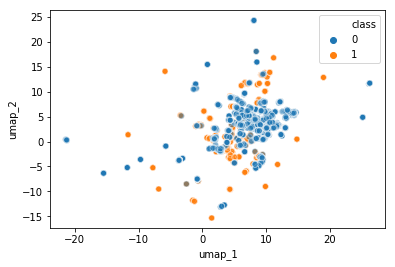

In [95]:
sns.scatterplot(x="umap_1", y="umap_2",hue = Y_num, data=umap_df,legend="full",alpha=0.5)

#### From the initial trial we can see that umap is not able to classify the data set properly and data points are not being detected or classified hence we will have to improve the hyper parameters.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#### To improve results we run a grid search on simple MLP to understand the variation from changing the hyper parametres 

In [30]:
mlp = MLPClassifier(max_iter=200)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(10,200), (20,400), (30,200), (20,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Grid Search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 

In [31]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.930 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 200), 'learning_rate': 'constant', 'solver': 'sgd'}
0.918 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 200), 'learning_rate': 'constant', 'solver': 'adam'}
0.927 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 200), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.923 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 200), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.927 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 400), 'learning_rate': 'constant', 'solver': 'sgd'}
0.920 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 400), 'learning_rate': 'constant', 'solver': 'adam'}
0.931 (+/-0.017) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 400), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.922 (+/-0.017) 

In [32]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30, 200), 'learning_rate': 'constant', 'solver': 'adam'}


#### Looking at the given results we can finally conclude that the best parameters is with activation layer as relu send alpha as 0.1 while the hidden layer sizes are 30 and 200. The optimiser use this item which is pretty obvious as SGD is worse in most cases.

Confusion Matrix:
 [[540  24]
 [ 33 324]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       564
           1       0.93      0.91      0.92       357

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



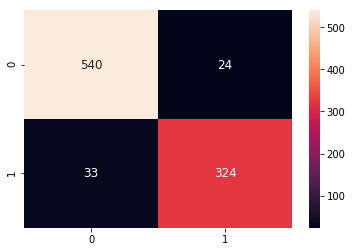

In [33]:
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

#### Looking at the classification report we can see a higher number of false negatives which is not a good sign but since our F1 score is high enough we can accept this model to a certain level

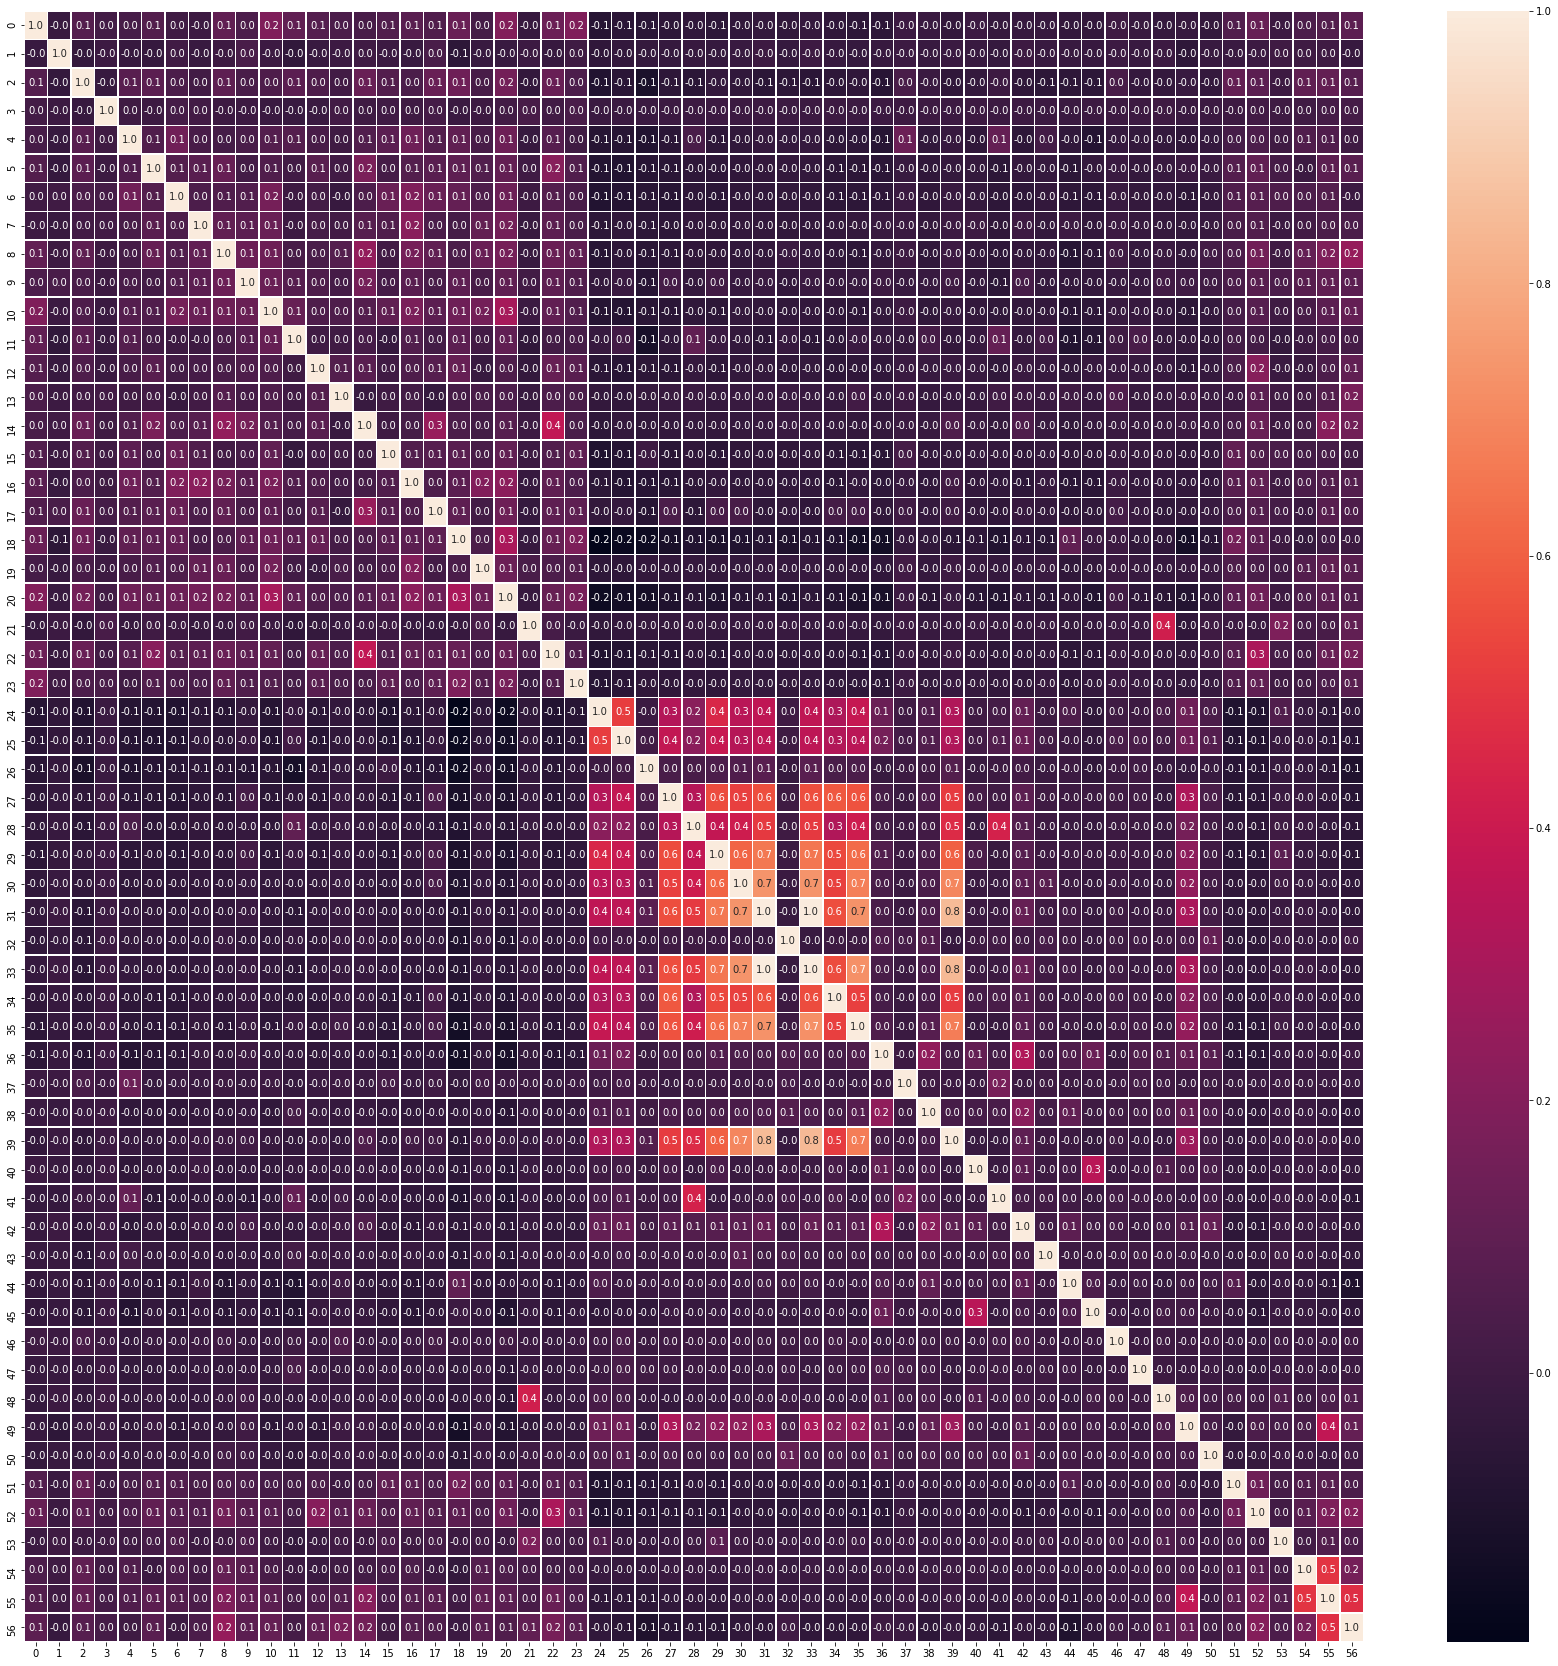

In [96]:
X_df = df_norm.drop(['class'], axis = 1)
plt.subplots(figsize=(30, 30))
sns.heatmap(X_df.corr(), annot=True, linewidths=.5, fmt= '.1f')

#### from the above correlation matrix we can see a set of features which is highly correlated in the middle and a few more features at the end. Such a high correlation between features is a problem for umap to run and we will try to remove these features and the umap again.

In [41]:
# SelectKBest Features using F-Test

# Assign a score to each feature
x_new_f = SelectKBest(f_classif, k=46)
x_train_f = x_new_f.fit_transform(X_train, y_train)
scores = x_new_f.scores_
scores /= scores.max()

# Make a table of feature and its score in descending order
x_new_f_df = pd.DataFrame()
x_new_f_df['f_Features'] = np.arange(0,57,1)
x_new_f_df['f_Scores'] = x_new_f.scores_
x_new_f_df.sort_values(['f_Scores'], ascending = False)

,f_Features,f_Scores
20,20,1.000000
22,22,0.819126
52,52,0.764989
6,6,0.761247
18,18,0.499816
16,16,0.478208
56,56,0.467011
15,15,0.450267
24,24,0.440774
5,5,0.383713


#### we have dropped almost 11 features including reducing the day nationality of the original data set from 57 to 46.

In [42]:
# Using Features selected through F-test to train model and test it

# Specify Classifier
mlp = MLPClassifier(max_iter=500)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(10,200), (20,400), (30,200), (20,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Grid Search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train_f, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (30, 200), 'learning_rate': 'adaptive', 'solver': 'adam'} 



#### the new updated best parameter is found by grid search again andwas very similar to the original one but alpha was reduced from 0.1 to 0.05

In [43]:
X_test_f = x_new_f.fit_transform(X_test, y_test)

Confusion Matrix:
 [[473  91]
 [ 85 272]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       564
           1       0.75      0.76      0.76       357

    accuracy                           0.81       921
   macro avg       0.80      0.80      0.80       921
weighted avg       0.81      0.81      0.81       921



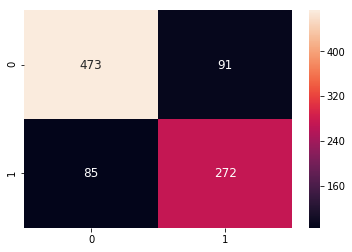

In [97]:
# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test_f)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12})

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


#### After removing the highly correlated features we can see a slight improvement in the detection of false negative since it has dropped from previous 350 to 272 however instead of seeing an increase in the true positive we are seeing increase in the true negative and false positive.

### Univariate feature Selection Chi Square Test
A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

In [98]:
# Univariate feature Sewlection Chi Square Test
## MAking all the vakues positive by adding the min value to all dat points
np.amin(X_train)

-0.9362423538263125

In [50]:
## this step had to be hard coded to solve scope issues of the variables
X_train1 = X_train + 0.94
X_test1 = X_test + 0.94
print("Min of X_train1 is :",np.amin(X_train1))
print("Min of X_test1 is :",np.amin(X_test1))

Min of X_train1 is : 0.0037576461736874567
Min of X_test1 is : 0.0037576461736874567


#### Calculating the cChi Square values for all the features and sorting them by descending order to see which features are having the best Chi scores and to check if there are any NAN values.


In [52]:
# SelectKBest Features using Chi-Square-Test

# Assign a score to each feature
x_new_chi2 = SelectKBest(chi2, k=46)
x_train_chi2 = x_new_chi2.fit_transform(X_train1, y_train)
scores = x_new_chi2.scores_
scores /= scores.max()

# Make a table of feature and its score in descending order
x_new_chi2_df = pd.DataFrame()
x_new_chi2_df['chi2_Features'] = np.arange(0,57,1)
x_new_chi2_df['chi2_Scores'] = x_new_chi2.scores_
x_new_chi2_df.sort_values(['chi2_Scores'], ascending = False)

,chi2_Features,chi2_Scores
20,20,1.000000
22,22,0.871817
52,52,0.748077
6,6,0.726948
18,18,0.532109
16,16,0.526417
15,15,0.515210
24,24,0.483106
56,56,0.454969
51,51,0.452461


#### Since we did not observe any Indian values that means we do not have any features which is not contributing.

In [53]:
mlp = MLPClassifier(max_iter=500)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(10,200), (20,400), (30,200), (20,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Grid Search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train_chi2, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (20, 100), 'learning_rate': 'adaptive', 'solver': 'adam'} 



#### Again running grid search for Chi Square values, After which we take the alpha value as 0.1 and hidden layer values are 20 and 100 compared to 3 and 100 previously

In [54]:
# Preparing testing data

X_test_chi2 = x_new_chi2.fit_transform(X_test1, y_test)

Confusion Matrix:
 [[415 149]
 [ 65 292]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       564
           1       0.66      0.82      0.73       357

    accuracy                           0.77       921
   macro avg       0.76      0.78      0.76       921
weighted avg       0.79      0.77      0.77       921



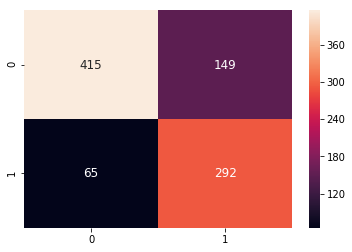

In [99]:
y_true, y_pred = y_test , clf.predict(X_test_chi2)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

#### Again by observing the confusion matrix we can see that there is a slight decrease in the number of false negatives and an increase in true positives while there is a very big increase in true negatives which is concerning since the f1 score has also reduced. This could be due to several reasons firstly the para metres past would not the best, this may be due to lack of options for grid search to test.

### Univariate feature Seclection Mutual Information
Mutual information is a measure between two (possibly multi-dimensional) random variables X and Y, that quantifies the amount of information obtained about one random variable, through the other random variable. This quantity is called the joint mutual information, and maximising this quantity is an NP-hard optimisation problem, because the set of possible combinations of features grows exponentially.

In [56]:
# Univariate feature Seclection Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=46)
x_train_mi = x_new_mi.fit_transform(X_train, y_train)
scores = x_new_mi.scores_
scores /= scores.max()

# Create a table of feature and its score in descending order
x_new_mi_df = pd.DataFrame()
x_new_mi_df['mi_Features'] = np.arange(0,57,1)
x_new_mi_df['mi_Scores'] = x_new_mi.scores_
x_new_mi_df.sort_values(['mi_Scores'], ascending = False)

,mi_Features,mi_Scores
51,51,1.000000
52,52,0.919940
55,55,0.871871
54,54,0.782986
20,20,0.781282
6,6,0.687092
15,15,0.673264
56,56,0.614583
23,23,0.589739
18,18,0.537537


#### Again we create a dataset from the original one for the new model of mutual information, here also we have removed the 11 highly correlated features which will help us in improving our results.

In [57]:
# Using Features selected through Mutual Information Test to train model and test it

# Specify Classifier
mlp = MLPClassifier(max_iter=500)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(10,200), (20,400), (30,200), (20,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Grid Search
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train_mi, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 200), 'learning_rate': 'adaptive', 'solver': 'adam'} 



#### Testing All the different hyper para metres in the para metres space given above we can find it decide on the best parameter which is same as TSNE, here we have alpha as 0.05 and are hidden layer space with 10 and 200 notes at hidden layer one and hidden layer two respectively

In [58]:
X_test_mi = x_new_mi.fit_transform(X_test, y_test)

Confusion Matrix:
 [[507  57]
 [ 98 259]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       564
           1       0.82      0.73      0.77       357

    accuracy                           0.83       921
   macro avg       0.83      0.81      0.82       921
weighted avg       0.83      0.83      0.83       921



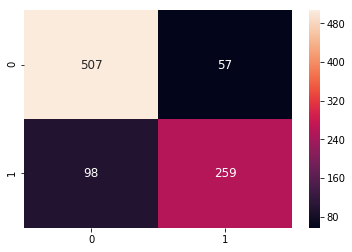

In [101]:
# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test_mi)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

### Conclution

#### we can see a great improvement with you map over previous message since we have a good value for true positives and false negatives whereas two negatives and false positives are still low this means the classification is better compared to the previous methods. Based on my current data it is sure to say that UMAP with mutual Information is relatively a better model and a better choice to reduce the dimentionality.Even though we only have 83% accuracy over to set does not mean that this is relatively poor model since we have better classification of true positives and false negatives. Will simply look at just accuracy scores then MLP has a better accuracy but the number of false negatives classified is less. 


### Future Scope
1. We can change of close validation method from simple train train split to K-fold and specifically stratified K-fold. 
2. We can for the test on more advanced methods of classification.
3. Add a penalty of cost for classifying incorrectly using penalising algorithms.
4. Generate more data from the given data to add more data points and reinforce the existing learning further on data points which are directly related to the outcome.

My idea of using statified K-fold Should lead to better understanding of test accuracy since each of the force will have unique data and since our data set is vast enough and only has two classes we can have multiple K-folds the stratified case is satisfied. Observing from the previous assignment dataset where there were too many classes and less data points, Hence folds created could not be stratified because each class will not have a data point in each of the folds which is exclusive.